<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Trabajo de fin de Máster</p>
<p style="margin: 0; text-align:right;"> Máster Universitario en Ciencia de Datos</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">   (Data Science) </p>
<p style="margin: 0; text-align:right;">
</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Estudio comparativo de modelos de predicción estocásticos y heurísticos aplicados a la estimación de la calidad del aire


## **Autor:** Nadia Sánchez Pozo .


# Experimentos

In [0]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns

In [0]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [6]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
df = pd.read_csv('/content/gdrive/My Drive/df_clean.csv', parse_dates=['Datetime'], index_col='Datetime',  header=0)
upsampled = df.resample('D')
interpolated = upsampled.interpolate(method='linear')
len(interpolated)
df_o3_resample = interpolated
df_O3=df_o3_resample.reset_index()
df_O3.head()

,Datetime,O3
0,2008-01-01,32.600000
1,2008-01-02,32.203226
2,2008-01-03,31.806452
3,2008-01-04,31.409677
4,2008-01-05,31.012903


Cargamos los datos climáticos del dataset "weather_daily_darksky.csv"

In [8]:
clima = pd.read_csv('/content/gdrive/My Drive/weather_daily_darksky.csv')
clima.head(5)

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureMax,uvIndex,time,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,10.87,rain,3.30,0.95,2011-11-11 19:00:00,10.87,11.96,1.0,2011-11-11 00:00:00,2011-11-11 16:19:21,10.87,8.85,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,5.62,rain,12.09,0.88,2011-12-11 19:00:00,-0.64,5.72,1.0,2011-12-11 00:00:00,2011-12-11 15:52:53,3.09,2.48,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,10.33,rain,13.39,0.74,2011-12-27 14:00:00,5.52,10.33,0.0,2011-12-27 00:00:00,2011-12-27 15:57:56,8.03,8.03,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,5.33,rain,11.89,0.87,2011-12-02 12:00:00,3.26,5.33,1.0,2011-12-02 00:00:00,2011-12-02 15:56:17,6.33,2.56,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,5.02,rain,13.16,0.80,2011-12-24 15:00:00,4.37,5.32,1.0,2011-12-24 00:00:00,2011-12-24 15:55:55,7.45,3.17,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


Normalizamos la columna **time** en el dataframe de **clima** para convertirla en **timestam** con formato AÑO/MES/DÍA

In [0]:
clima['day']=  pd.to_datetime(clima['time']) # day is given as timestamp
clima['Datetime']=  pd.to_datetime(clima['day'],format='%Y%m%d').dt.date
# selecting numeric variables
clima = clima[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase','Datetime']]
clima = clima.dropna()

In [0]:
df_O3['Datetime']=  pd.to_datetime(df_O3['Datetime'],format='%Y-%m-%d').dt.date

In [39]:
clima_o3 =  df_O3.merge(clima,on='Datetime')
clima_o3.tail(2)


,Datetime,O3,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
879,2014-03-30,26.025806,19.82,114,5.81,0.31,2.18,1013.04,19.82,11.56,0.62,10.98,19.82,3.0,10.98,8.53,19.82,8.14,0.99
880,2014-03-30,26.025806,16.37,138,7.61,0.32,1.92,1012.74,16.37,13.29,0.67,7.77,16.37,3.0,7.77,10.98,16.37,10.98,0.03


#**Temperatura**

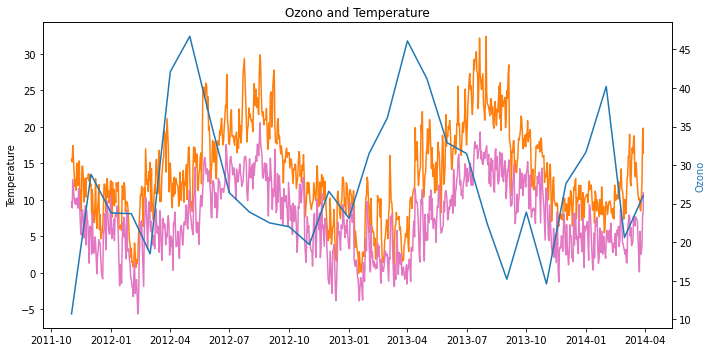

In [12]:
fig, ax1 = plt.subplots(figsize = (10,5))
ax1.plot(clima_o3.Datetime, clima_o3.temperatureMax, color = 'tab:orange')
ax1.plot(clima_o3.Datetime, clima_o3.temperatureMin, color = 'tab:pink')
ax1.set_ylabel('Temperature')


ax2 = ax1.twinx()
ax2.plot(clima_o3.Datetime,clima_o3.O3,color = 'tab:blue')
ax2.set_ylabel('Ozono',color = 'tab:blue')

plt.title('Ozono and Temperature')
fig.tight_layout()
plt.show()

#**Humedad**

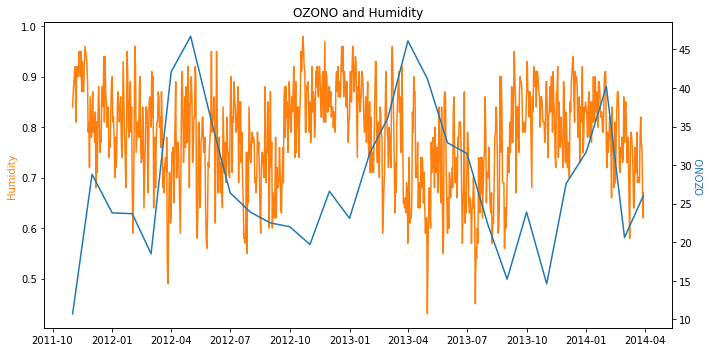

In [13]:
fig, ax1 = plt.subplots(figsize = (10,5))
ax1.plot(clima_o3.Datetime, clima_o3.humidity, color = 'tab:orange')
ax1.set_ylabel('Humidity',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(clima_o3.Datetime,clima_o3.O3,color = 'tab:blue')
ax2.set_ylabel('OZONO',color = 'tab:blue')
plt.title('OZONO and Humidity')
fig.tight_layout()
plt.show()

#**Indice_UV**

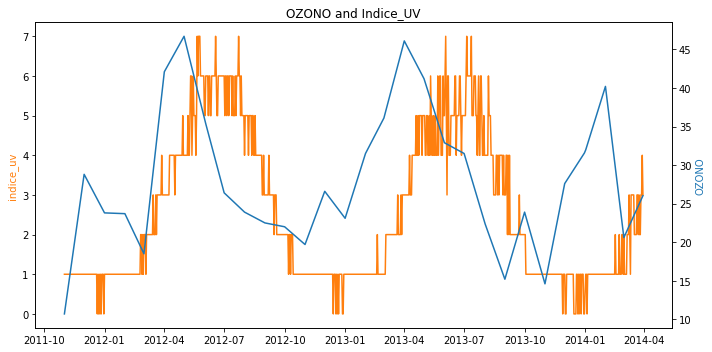

In [46]:
fig, ax1 = plt.subplots(figsize = (10,5))
ax1.plot(clima_o3.Datetime, clima_o3.uvIndex, color = 'tab:orange')
ax1.set_ylabel('indice_uv',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(clima_o3.Datetime,clima_o3.O3,color = 'tab:blue')
ax2.set_ylabel('OZONO',color = 'tab:blue')
plt.title('OZONO and Indice_UV')
fig.tight_layout()
plt.show()

In [15]:
# Encuentra todas las correlaciones con la puntuación y ordena 
correlations_data = clima_o3.corr()['O3'].sort_values()
correlations_data 

dewPoint                  -0.331559
apparentTemperatureMin    -0.261835
apparentTemperatureLow    -0.259685
temperatureLow            -0.249789
temperatureMin            -0.248371
humidity                  -0.234757
apparentTemperatureMax    -0.201591
windBearing               -0.200953
apparentTemperatureHigh   -0.195493
temperatureMax            -0.185636
temperatureHigh           -0.182208
pressure                  -0.159963
moonPhase                 -0.017532
visibility                 0.035857
cloudCover                 0.057904
windSpeed                  0.103181
uvIndex                    0.317676
O3                         1.000000
Name: O3, dtype: float64

In [0]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

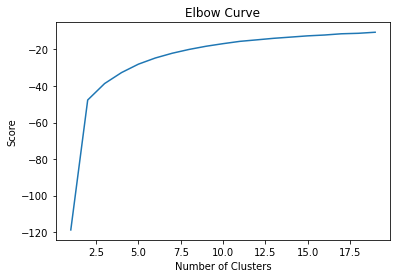

In [17]:
scaler = MinMaxScaler()
weather_scaled = scaler.fit_transform(clima_o3[['temperatureMax','humidity','uvIndex']])

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

score = [kmeans[i].fit(weather_scaled).score(weather_scaled) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [0]:
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
kmeans.fit(weather_scaled)
clima_o3['weather_cluster'] = kmeans.labels_


In [0]:

clima_o3.set_index(['Datetime'],inplace=True)

In [0]:
clima_o3.index = pd.to_datetime(clima_o3.index)

In [0]:
data=clima_o3[['O3','weather_cluster']]

In [22]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout 

Using TensorFlow backend.


In [0]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1
    df = pd.DataFrame(data)
    cols, names = list(), list()

    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    agg = pd.concat(cols, axis=1)
    agg.columns = names

    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [0]:
np.random.seed(11)
dataframe = clima_o3.loc[:,'O3']
dataset = dataframe.values
dataset = dataset.astype('float32')

In [25]:
reframed = series_to_supervised(dataset, 7,1)
reframed.head(3)
print ((reframed))

     var1(t-7)  var1(t-6)  var1(t-5)  ...  var1(t-2)  var1(t-1)    var1(t)
7    10.700000  11.303333  11.906667  ...  13.716666  14.320000  14.923333
8    11.303333  11.906667  12.510000  ...  14.320000  14.923333  15.526667
9    11.906667  12.510000  13.113334  ...  14.923333  15.526667  16.129999
10   12.510000  13.113334  13.716666  ...  15.526667  16.129999  16.733334
11   13.113334  13.716666  14.320000  ...  16.129999  16.733334  17.336666
..         ...        ...        ...  ...        ...        ...        ...
876  24.154839  24.341936  24.529032  ...  25.090322  25.277420  25.464516
877  24.341936  24.529032  24.716129  ...  25.277420  25.464516  25.651613
878  24.529032  24.716129  24.903225  ...  25.464516  25.651613  25.838709
879  24.716129  24.903225  25.090322  ...  25.651613  25.838709  26.025806
880  24.903225  25.090322  25.277420  ...  25.838709  26.025806  26.025806

[874 rows x 8 columns]


In [0]:
reframed['weather_cluster'] = clima_o3.weather_cluster.values[7:]


In [0]:
reframed = reframed.reindex(['weather_cluster','var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)','var1(t-2)', 'var1(t-1)', 'var1(t)'], axis=1)
reframed = reframed.values

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
reframed = scaler.fit_transform(reframed)

In [0]:
train = reframed[:(len(reframed)-365), :]
test = reframed[(len(reframed)-365):len(reframed), :]

In [0]:
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [31]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(509, 1, 8) (509,) (365, 1, 8) (365,)


In [32]:
model = Sequential()
model.add(LSTM(100 ,  return_sequences = True,  input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 100))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 100)            43600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 124,101
Trainable params: 124,101
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(train_X, train_y, epochs=20, batch_size=10, validation_split=.30, verbose=2, shuffle=False)

Train on 356 samples, validate on 153 samples
Epoch 1/20
 - 1s - loss: 0.0969 - val_loss: 0.0089
Epoch 2/20
 - 0s - loss: 0.0190 - val_loss: 0.0052
Epoch 3/20
 - 0s - loss: 0.0120 - val_loss: 0.0015
Epoch 4/20
 - 0s - loss: 0.0044 - val_loss: 4.8274e-04
Epoch 5/20
 - 0s - loss: 0.0034 - val_loss: 0.0030
Epoch 6/20
 - 0s - loss: 0.0032 - val_loss: 0.0032
Epoch 7/20
 - 0s - loss: 0.0036 - val_loss: 0.0041
Epoch 8/20
 - 0s - loss: 0.0043 - val_loss: 0.0045
Epoch 9/20
 - 0s - loss: 0.0035 - val_loss: 0.0018
Epoch 10/20
 - 0s - loss: 0.0033 - val_loss: 9.3350e-04
Epoch 11/20
 - 0s - loss: 0.0027 - val_loss: 0.0016
Epoch 12/20
 - 0s - loss: 0.0030 - val_loss: 0.0038
Epoch 13/20
 - 0s - loss: 0.0033 - val_loss: 0.0095
Epoch 14/20
 - 0s - loss: 0.0050 - val_loss: 0.0096
Epoch 15/20
 - 0s - loss: 0.0054 - val_loss: 0.0032
Epoch 16/20
 - 0s - loss: 0.0036 - val_loss: 5.7246e-04
Epoch 17/20
 - 0s - loss: 0.0033 - val_loss: 3.4939e-04
Epoch 18/20
 - 0s - loss: 0.0030 - val_loss: 0.0014
Epoch 19/20

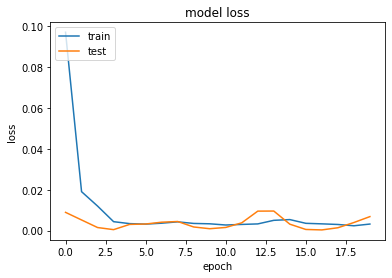

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
yhat = model.predict(test_X)

In [0]:
test_X = test_X.reshape(test_X.shape[0], test_X.shape[2])

In [0]:
test_y_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X,test_y_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)

In [0]:

inv_yhat = np.concatenate((test_X,yhat), axis=1)

inv_yhat = scaler.inverse_transform(inv_yhat)


In [41]:
from sklearn.metrics import mean_squared_error
act = [i[8] for i in inv_y] 
pred = [i[8] for i in inv_yhat] 
print(act)
print(pred)


import math
rmse = math.sqrt(mean_squared_error(act, pred))
print('Test RMSE: %.3f' % rmse)

[45.77742004394531, 45.77742004394531, 46.099998474121094, 45.936668395996094, 45.77333450317383, 45.61000061035156, 45.4466667175293, 45.28333282470703, 45.119998931884766, 44.9566650390625, 44.7933349609375, 44.630001068115234, 44.46666717529297, 44.3033332824707, 44.13999938964844, 43.97666549682617, 43.813331604003906, 43.650001525878906, 43.48666763305664, 43.323333740234375, 43.15999984741211, 42.996665954589844, 42.83333206176758, 42.66999816894531, 42.50666809082031, 42.34333419799805, 42.18000030517578, 42.016666412353516, 41.85333251953125, 41.689998626708984, 41.526668548583984, 41.36333465576172, 41.20000076293945, 40.93225860595703, 40.66451644897461, 40.39677429199219, 40.129032135009766, 39.861289978027344, 39.59354782104492, 39.3258056640625, 39.05806350708008, 38.790321350097656, 38.522579193115234, 38.25483703613281, 37.98709487915039, 37.719356536865234, 37.45161437988281, 37.18387222290039, 36.91613006591797, 36.64838790893555, 36.38064575195313, 36.1129035949707, 3

In [42]:
print('MAE:', metrics.mean_absolute_error(act, pred))
print('MSE:', metrics.mean_squared_error(act, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(act, pred)))

MAE: 1.8953965477408747
MSE: 5.248268093741479
RMSE: 2.2909098833741757


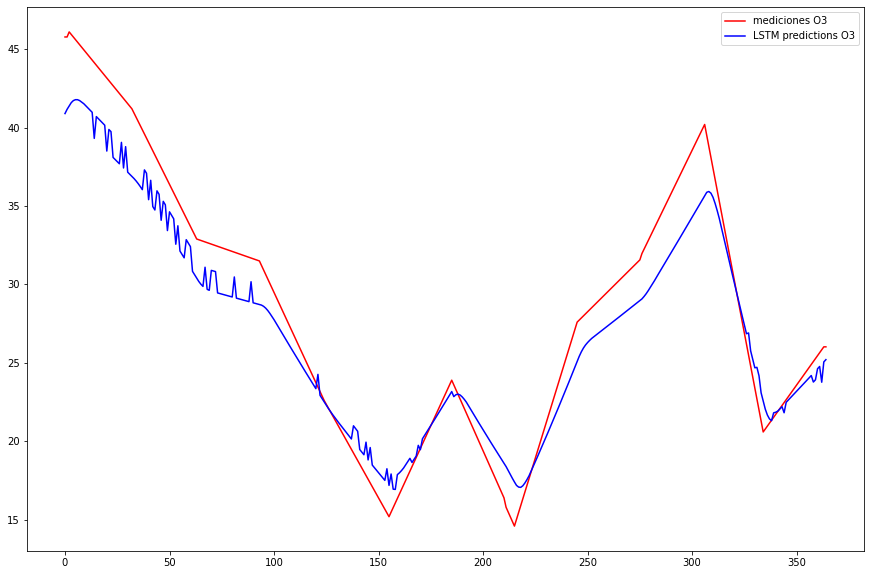

In [45]:
predicted_lstm = pd.DataFrame({'predicted':pred,'O3':act})
predicted_lstm['O3'].plot(figsize=(15,10),color = 'red', label= 'mediciones O3')
predicted_lstm['predicted'].plot(color = 'blue',label= 'LSTM predictions O3')
plt.legend()
plt.show()

Referencias:

[1] J. Brownlee, «How to Convert a Time Series to a Supervised Learning Problem in Python,» Machine Learning Mastery, 8 May 2017. [En línea]. Available: https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/.

[2] https://www.kaggle.com/rheajgurung/energy-consumption-forecast